In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/percentage_origin_names_municipality_classified_by_secondsurname.csv")
df.head()

,uf_mun_x,total,AFR,ASI,EST,FRC,GER,GRE,IBR,ITA,JEW,MUS,NOR,RUS
0,AC_ACRELANDIA,11269,0.2573,0.8608,0.0532,2.2451,0.8253,0.0355,95.2968,0.2218,0.0000,0.1509,0.0444,0.0089
1,AC_ASSIS BRASIL,7465,0.1206,1.0449,0.0000,1.7950,0.2545,0.0268,95.5928,0.8707,0.0134,0.2411,0.0134,0.0268
2,AC_BRASILEIA,36315,3.0180,1.8587,0.0909,18.4194,3.3512,0.0441,71.8463,0.4186,0.1597,0.6554,0.1019,0.0358
3,AC_BUJARI,6946,0.2160,0.6766,0.0144,0.9070,0.4175,0.0144,97.4950,0.1008,0.0000,0.1296,0.0288,0.0000
4,AC_CAPIXABA,6317,0.1900,0.9023,0.0158,0.8073,0.3324,0.0158,97.3088,0.2216,0.0000,0.1741,0.0158,0.0158


In [ ]:
polygon = gpd.read_file(r'../data/municipios_2010.shp')
polygon['populacao'] = polygon['populacao'].astype(int)
polygon['pib'] = polygon['pib'].astype(int)
polygon['pib_percapita'] = polygon['pib']/polygon['populacao']
polygon['log_pib_percapita'] = np.log(polygon['pib_percapita'])
polygon['codigo_ibg']=polygon['codigo_ibg'].fillna(0).astype(int)
polygon.sort_values(by=['pib_percapita'],ascending=False).head(5)

,id,nome,uf,populacao,pib,estado_id,codigo_ibg,geometry,pib_percapita,log_pib_percapita
4510,559,São Francisco do Conde,BA,33183,9848259,5,2929206,"POLYGON ((-38.64788 -12.56690, -38.64348 -12.5...",296.786276,5.693012
2359,3649,Porto Real,RJ,16592,4820284,19,3304110,"POLYGON ((-44.27402 -22.40580, -44.27666 -22.4...",290.518563,5.671667
2375,5091,Louveira,SP,37125,8914891,26,3527306,"POLYGON ((-46.90959 -23.05695, -46.90398 -23.0...",240.131744,5.481188
363,1543,Confins,MG,5936,1424974,11,3117876,"POLYGON ((-43.94119 -19.66307, -43.94450 -19.6...",240.056267,5.480873
3652,4378,Triunfo,RS,25793,5777746,23,4322004,"POLYGON ((-51.56618 -29.77937, -51.55790 -29.7...",224.004420,5.411666


In [ ]:
counties = pd.read_csv(r'../data/basic_data_municipios.csv')
counties['Código IBGE'] = counties['Código IBGE'].fillna(0).astype(int) 
counties.head()

,Unnamed: 0,Unnamed: 0_x,Código IBGE,Nome do Município,Código UF,UF,Estado,Latitude,Longitude,municipios_tratados,uf_mun_x,uf_mun2,Unnamed: 0_y,UF1,CIDADE1,count,uf_mun_y
0,0,0.0,5200050,Abadia de Goiás,52.0,GO,Goiás,-16.75730,-49.4412,ABADIA DE GOIAS,GO_ABADIA DE GOIAS,GO_ABADIA DE GOIAS,2268,GO,ABADIA DE GOIAS,6590,GO_ABADIA DE GOIAS
1,1,1.0,3100104,Abadia dos Dourados,31.0,MG,Minas Gerais,-18.48310,-47.3916,ABADIA DOS DOURADOS,MG_ABADIA DOS DOURADOS,MG_ABADIA DOS DOURADOS,2846,MG,ABADIA DOS DOURADOS,8085,MG_ABADIA DOS DOURADOS
2,2,2.0,5200100,Abadiânia,52.0,GO,Goiás,-16.19700,-48.7057,ABADIANIA,GO_ABADIANIA,GO_ABADIANIA,2269,GO,ABADIANIA,11250,GO_ABADIANIA
3,3,3.0,3100203,Abaeté,31.0,MG,Minas Gerais,-19.15510,-45.4444,ABAETE,MG_ABAETE,MG_ABAETE,2847,MG,ABAETE,27356,MG_ABAETE
4,4,4.0,1500107,Abaetetuba,15.0,PA,Pará,-1.72183,-48.8788,ABAETETUBA,PA_ABAETETUBA,PA_ABAETETUBA,4726,PA,ABAETETUBA,144503,PA_ABAETETUBA


In [18]:
temp = pd.merge(counties[['Código IBGE','uf_mun_x','UF']],polygon,how='inner',left_on='Código IBGE',right_on='codigo_ibg')


(5564, 13)

In [19]:
df = pd.merge(df,temp,how='inner',left_on='uf_mun_x',right_on='uf_mun_x')

AFR


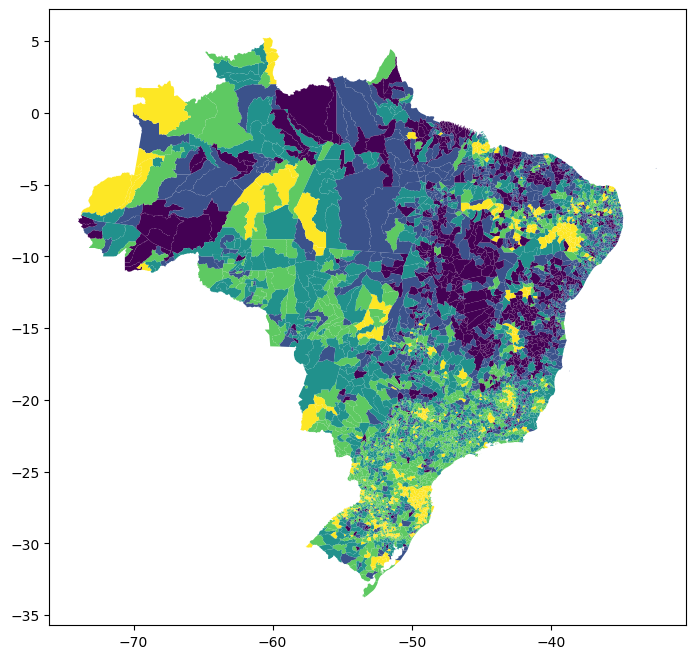

ASI


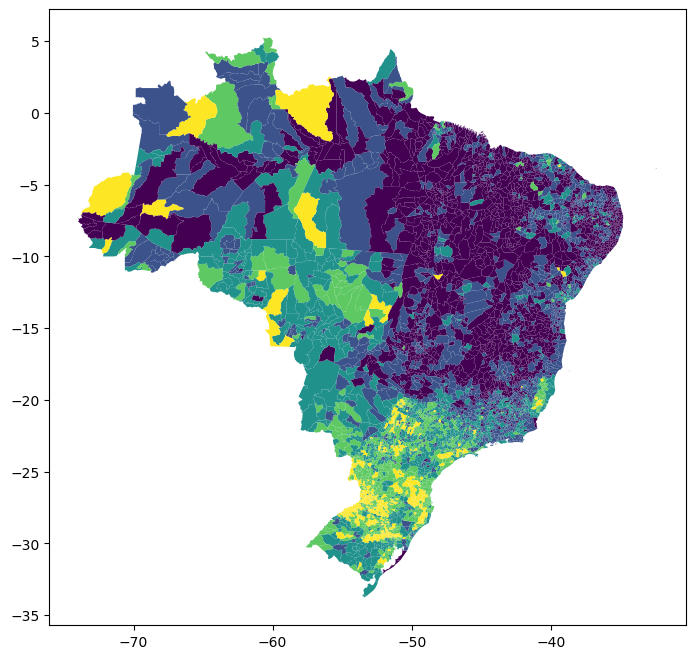

EST


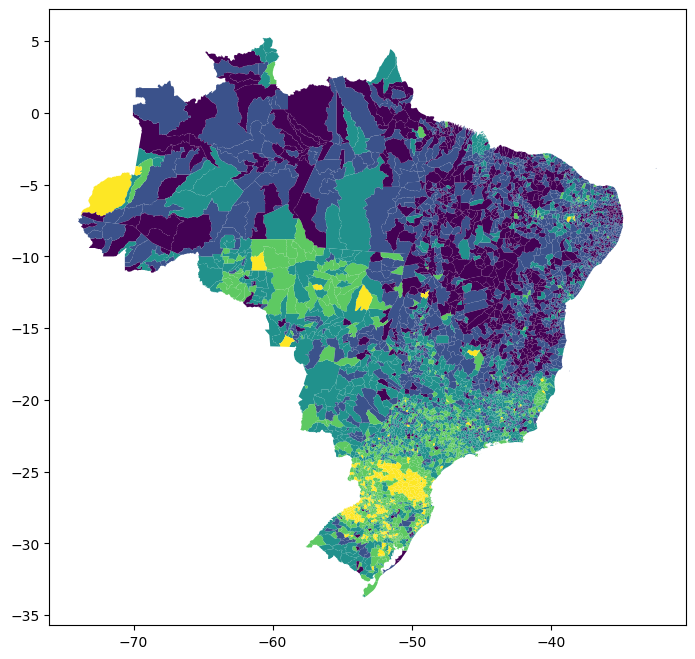

FRC


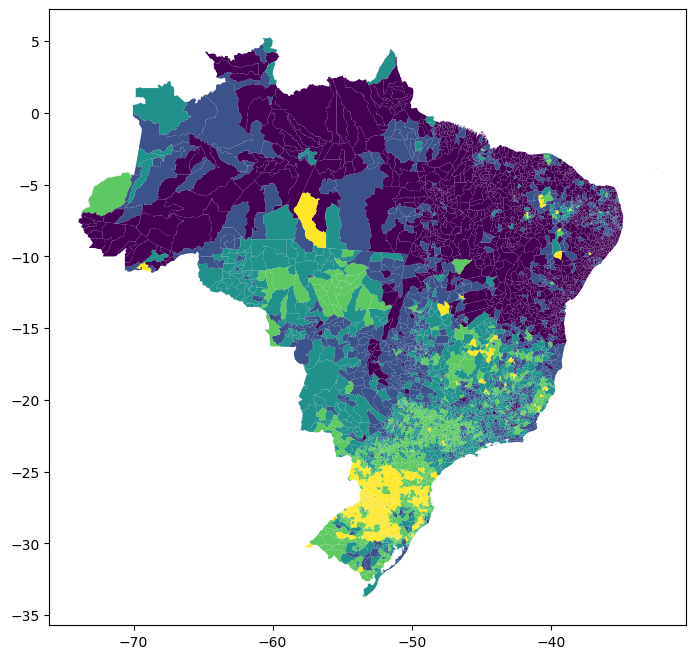

GER


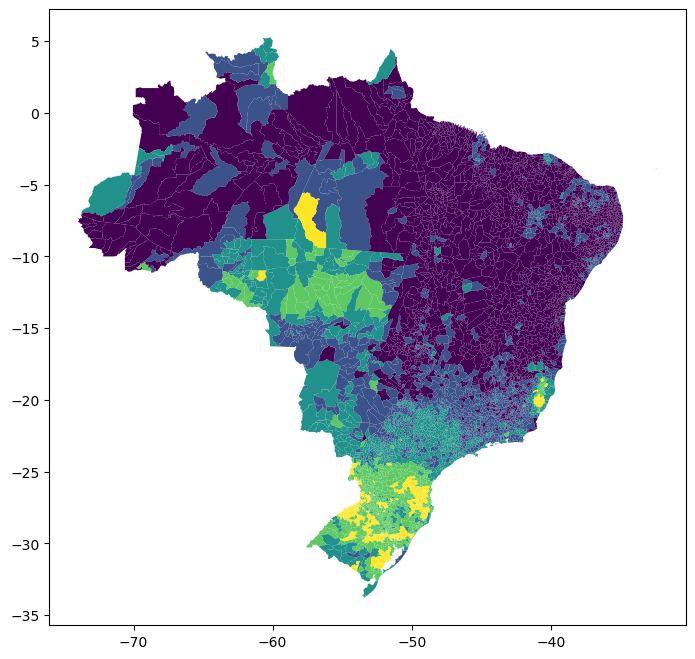

GRE


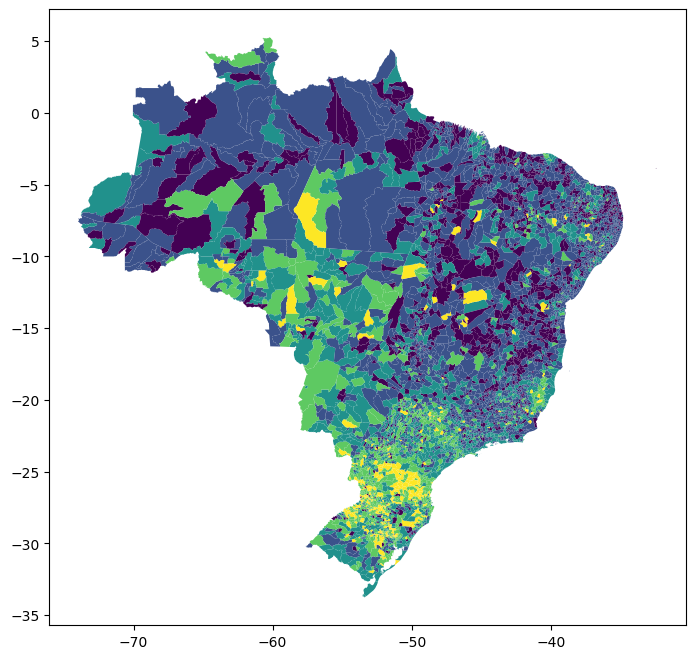

ITA


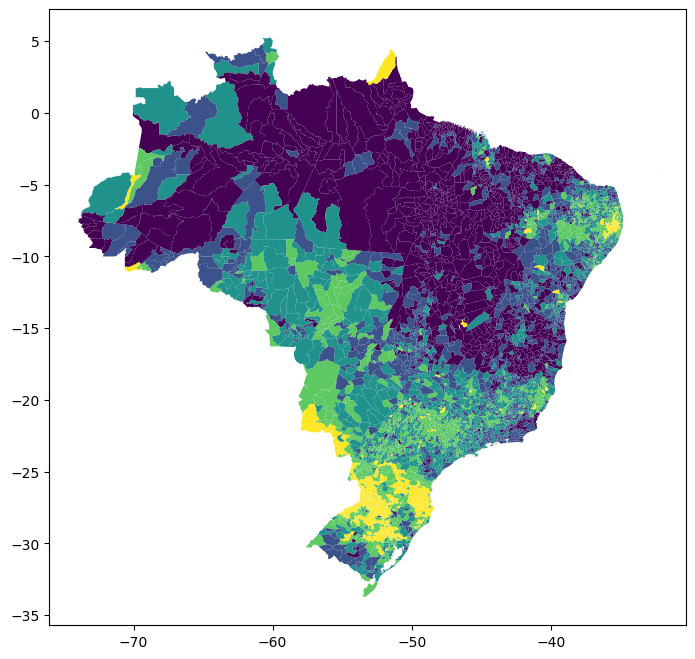

JEW


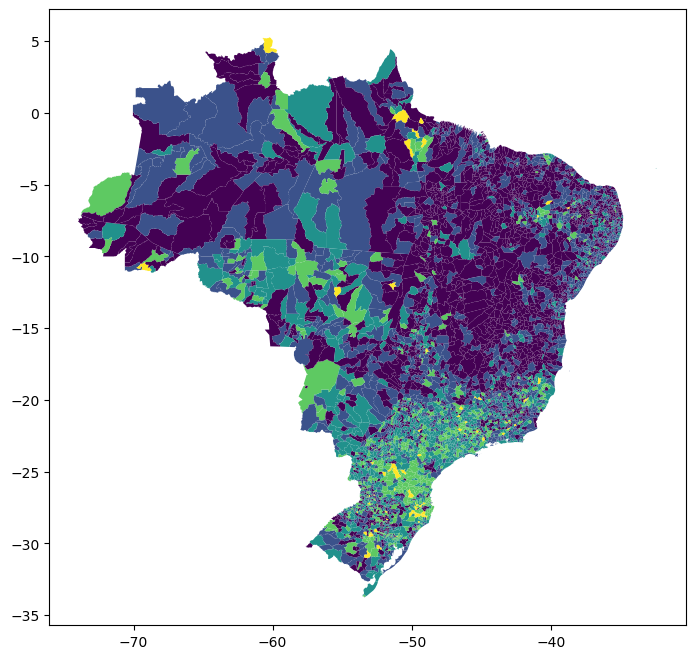

MUS


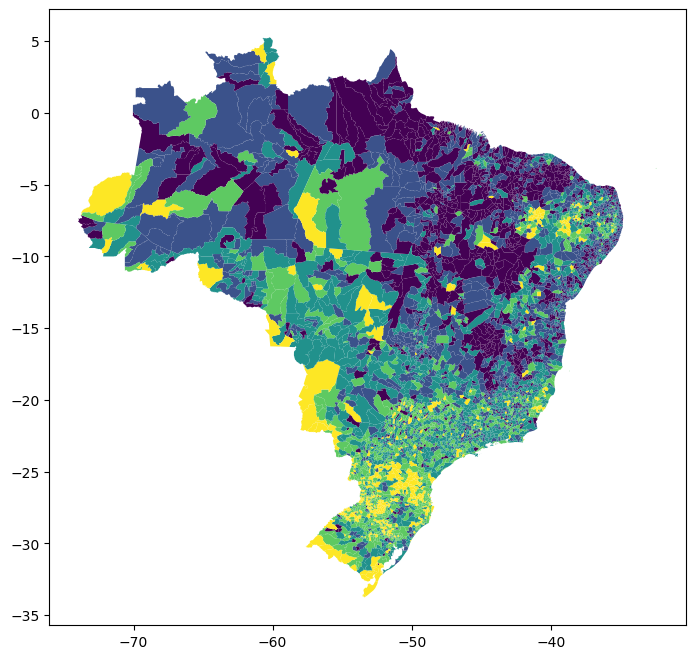

NOR


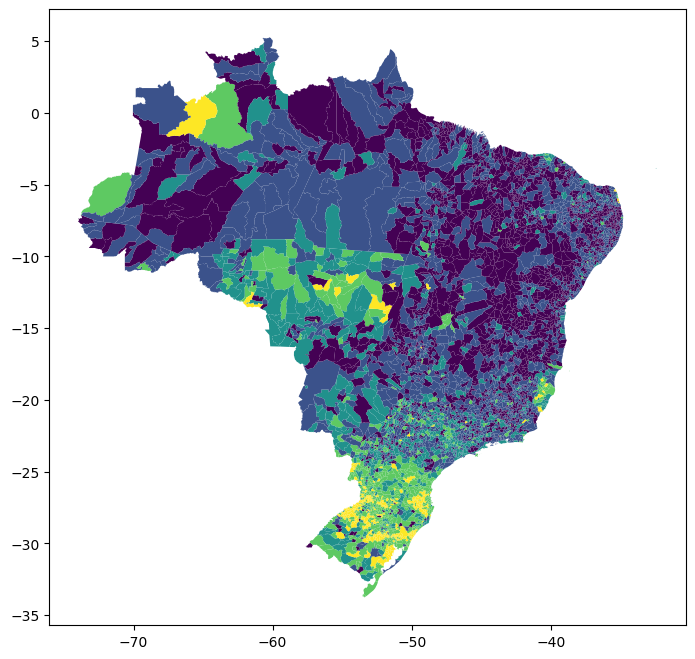

RUS


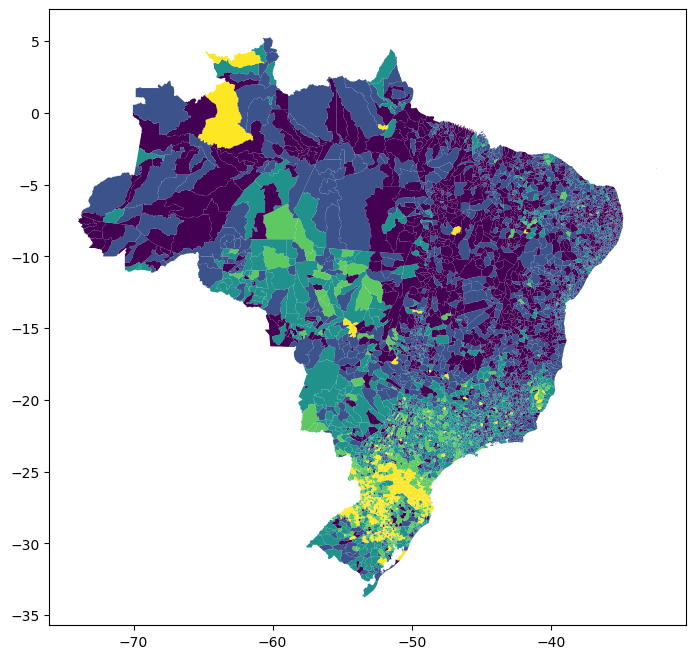

In [31]:
df = gpd.GeoDataFrame(df.fillna(0))

for variable in ['AFR', 'ASI', 'EST', 'FRC', 'GER', 'GRE', 'ITA', 'JEW', 'MUS', 'NOR', 'RUS']:
    print(variable)
    df.plot(column=variable, figsize=(12,8), scheme='JenksCaspallSampled')
    plt.show()